# Linear Models
Các mô hình tuyến tính là một lớp của các mô hình được sử dụng rộng rãi trong thực tế và được nghiên cứu rộng hơn trong những thập kỉ gần đây
Linear models dự đoán nhờ vào các hàm tuyến tính (linear function) của input features  

**Tham Khảo**
- Sách ML cơ bản: chương 7 trang 84
- Sách introductiontomachinelearningwithpython: trang 47

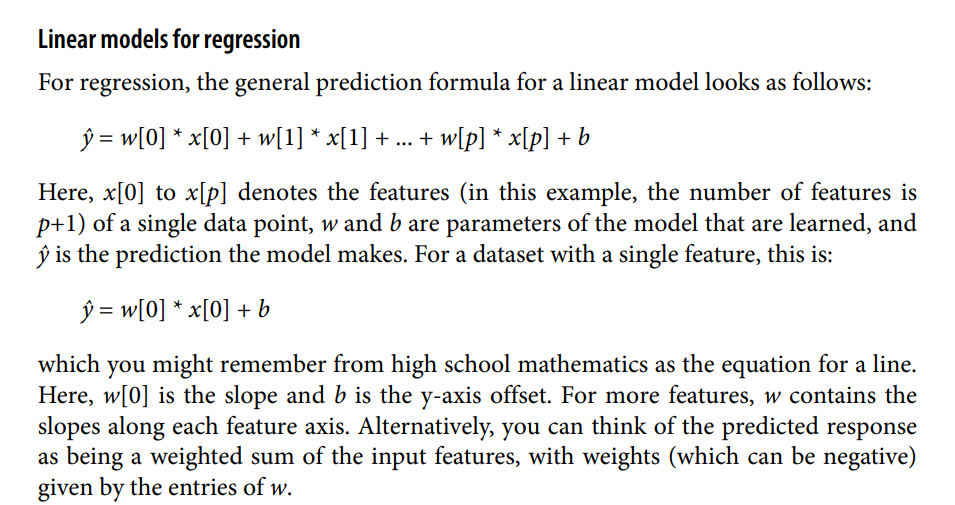

x[n] là những feature của dataset

In [36]:
import mglearn
import matplotlib.pyplot as plt #Visualization with Python
import pandas as pd
import numpy as np #hàm thư viện toán học

w[0]: 0.393906  b: -0.031804


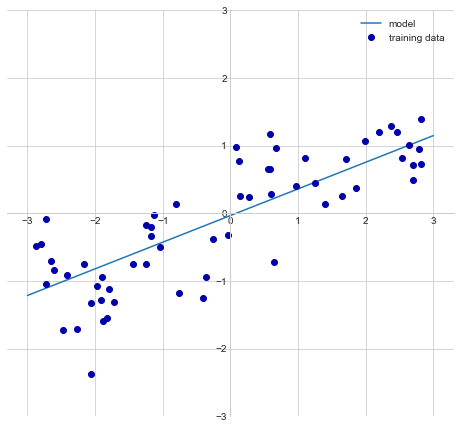

In [37]:
mglearn.plots.plot_linear_regression_wave()

- w[0]: slope that should around 0.4
- b:  y-axis offset that is below zero
- linear models for regression, 1 **đường thẳng (line)** cho 1 feature, 1 **mặt phẳng (plane)** cho 2 feature và **siêu phẳng (hyper-plane)** cho nhiều chiều hơn (nhiều feature hơn)

Trong trường hợp 1 feature có vẻ 1 line quá đơn giản và làm mất nhiều thông tin  
nhưng trong trường hợp nhiều features, linear model rất mạnh mẽ, cụ thể nếu có nhiều feature hơn training data point có thể ra được kết quả cho w và b càng chuẩn

## Linear regression (aka ordinary least squares) - OLS
- là mô hình đơn giản và cổ điển nhất của regression
- LR tìm các tham số w và b, cái giảm thiểu trung bình sai số (mean squared error) giữa yhat và y (dự đoán và thực tế)
- LR không có tham số, đó là lợi thế những cũng không có cách nào kiểm soát sự phức tạp của mô hình (model complexity)
- mean squared error: is the sum of the squared differences between the predictions and the true values, divided by the number of samples: tổng của bình phương trị tuyệt đối của hiệu giá trị thực tế và giá trị dự đoán, được chia tiếp cho số mẫu 

### Theo hướng dẫn trong introduction 

In [38]:
from sklearn.linear_model import LinearRegression
import sklearn
from sklearn.model_selection import train_test_split

In [39]:
X,y = mglearn.datasets.make_wave(n_samples=60) # tạo ra một tuple
# help(mglearn.datasets.make_wave())
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr= LinearRegression().fit(X_train, y_train) # The “slope” parameters (w), also called weights or coefficients, are stored in the coef_ attribute, while the offset or intercept (b) is stored in the intercept_ attribute
X_train?

In [40]:
print("lr.coef_ (coefficients : hệ số): {}".format(lr.coef_)+" "+"là 1 numpy array với one entry per input feature")
print("lr.intercept_: {}".format(lr.intercept_)+" "+"luôn luôn là 1 a single float number")
print("lr.rank_ : {}".format(lr.rank_ ))
print("lr.singular_  : {}".format(lr.singular_ ))

lr.coef_ (coefficients : hệ số): [0.39390555] là 1 numpy array với one entry per input feature
lr.intercept_: -0.031804343026759746 luôn luôn là 1 a single float number
lr.rank_ : 1
lr.singular_  : [12.27819042]


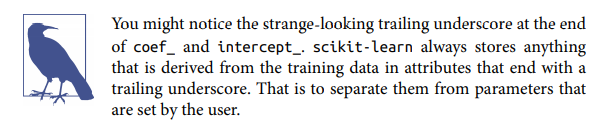

In [41]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))
# lr.score?

Training set score: 0.67
Test set score: 0.66


In [42]:
X, y = mglearn.datasets.load_extended_boston()
X.shape
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)
# print("lr.coef_ (coefficients : hệ số): {}".format(lr.coef_))
# print("lr.intercept_: {}".format(lr.intercept_))
# print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
# print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

### Thử nghiệm để tìm hiểu w và b được tìm ra ntn? (ML Cơ Bản trang 87)

#### Tính Toán

In [43]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
# height (cm), input data, each row is a data point
X = np.array([[147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183]]).T
# weight (kg)
y = np.array([ 49, 50, 51, 54, 58, 59, 60, 62, 63, 64, 66, 67, 68])

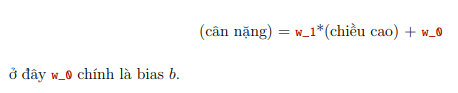

In [44]:
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis = 1) # each point is one row

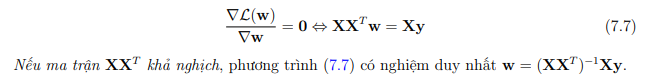
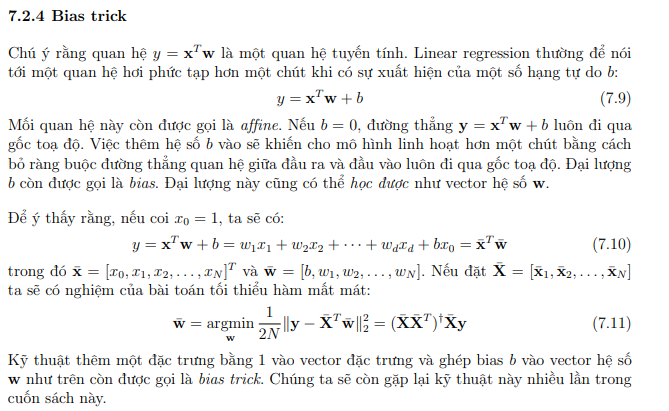

Vì coi b=w_0 nên phải để "feature[1]"=1

In [45]:
# Calculating weights of the fitting line
A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w = np.dot(np.linalg.pinv(A), b)
# weights
w_0, w_1 = w[0], w[1]
print("w_0: ", w_0)
print("w_1: ", w_1)
lr= LinearRegression().fit(X, y)
print("lr.coef_ (coefficients : hệ số): {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

w_0:  -33.73541020578887
w_1:  0.5592049619395709
lr.coef_ (coefficients : hệ số): [0.55920496]
lr.intercept_: -33.73541020580774


In [46]:
y1 = w_1*155 + w_0
y2 = w_1*160 + w_0
print("Input 155cm, true output 52kg, predicted output %.2fkg" %(y1) )
print("Input 160cm, true output 56kg, predicted output %.2fkg" %(y2) )

Input 155cm, true output 52kg, predicted output 52.94kg
Input 160cm, true output 56kg, predicted output 55.74kg


#### Đồ thị hóa

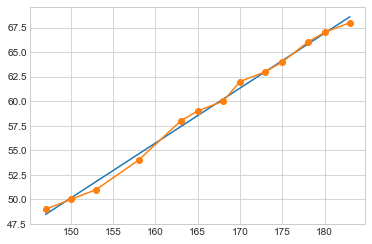

In [47]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure()
ax = plt.axes()
ax.plot(X,  w_1*X + w_0); #dự đoán
ax.plot(X, y,'o', linestyle='solid') #thực tế

#### Kết Luận

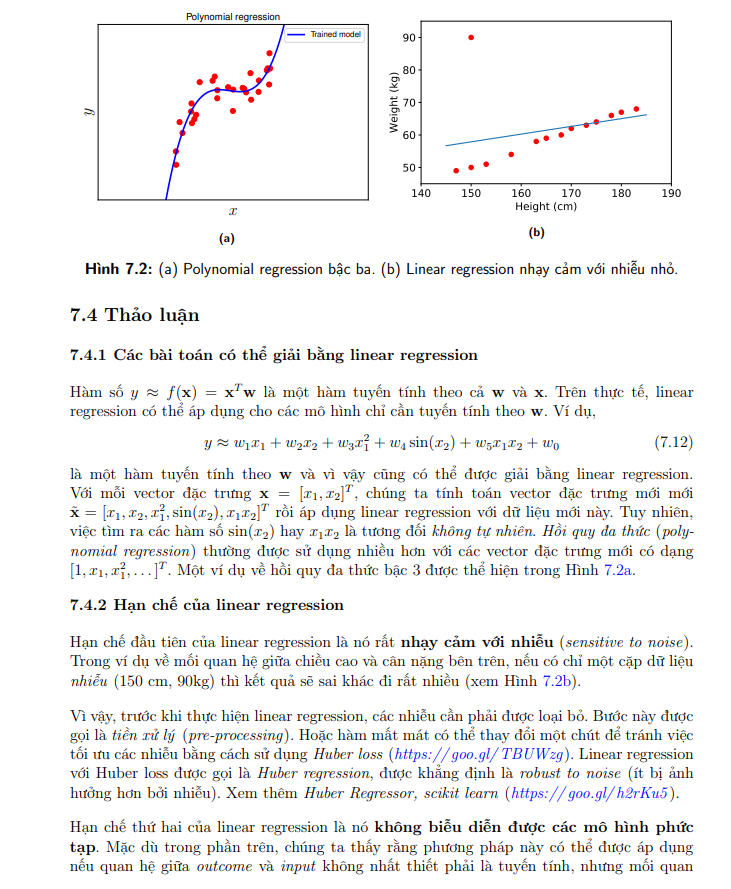

##### Các bài toán có thể giải

##### Các hạn chế
- nhạy cảm với nhiễu (sensitive to noise)
- Không biểu diễn được các mô hình phức tạp 

## Ridge regression (Intro: 51, MLCB: 90)

Theo trang https://hutapps.net/2019/06/10/supervised-learning-thuc-hanh-phan-2/ 
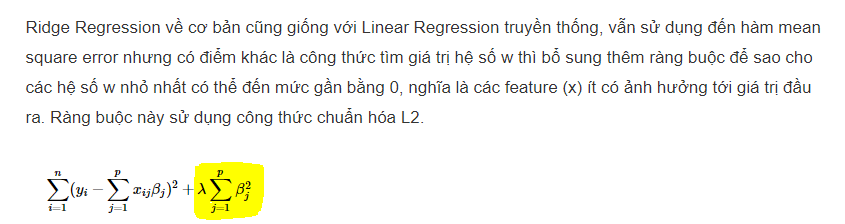
- Cũng giống như sách introduction, Ridge Regression có hệ số (coefficients w) được chọn không chỉ tiên đoán tốt ở tập train mà tất cả các tập. Muốn độ lớn của các của các hệ số nhỏ nhất có thể, hay nói cách khác tất cả w nên tiến dần về 0
- Vì thế nghĩa là mỗi feature có ít tác động lên đầu ra nhất có thể (to having small slope) trong khi vẫn tiên đoán tốt
- Sự ràng buộc là ví vụ của cái được gọi là chính quy hóa (regularization), regilarization có nghĩa hạn chế một cách rõ ràng tránh tình trạng overfitting

In [48]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
#print("Training set score before: {:.2f}".format(lr.score(X_train, y_train)))
#print("Test set score before: {:.2f}".format(lr.score(X_test, y_test)))
#print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
#print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))
# training score < score lúc đầu trong khi đó test score > score lúc đầu => tránh overfitting

- Linear regression ít phức tạp hơn nên hiệu quả lúc train cũng thấp hơn, nếu chỉ quan tâm đến hiệu suất tổng quát thì chọn ridge
- Ridge đánh đổi giữa sự đơn giản và sự hiệu quả trong quá trình train thông qua các sử dụng **alpha parameter**
- Các alpha parameters tăng thì hiệu năng giảm nhưng quá trình generation tốt hơn 
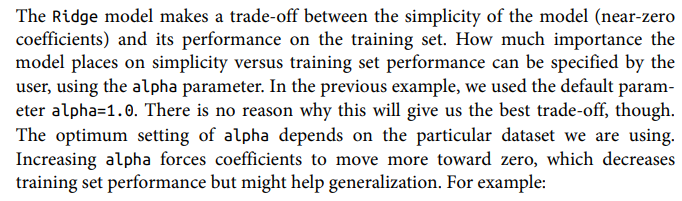

In [49]:
# alpha = 10
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


In [50]:
# alpha =0.1
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


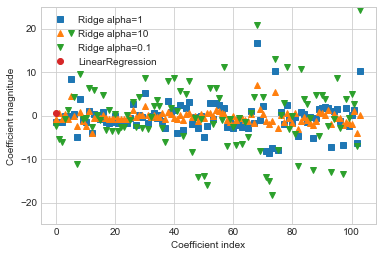

In [51]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

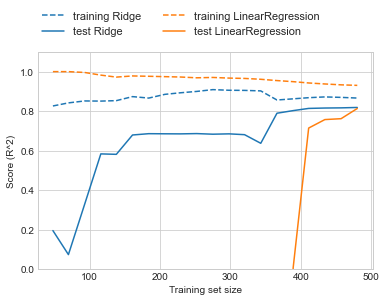

In [52]:
mglearn.plots.plot_ridge_n_samples()

Tóm lại là thằng Ridge cho kết quả tốt hơn nhưng hiệu năng sẽ giảm do phức tạp hơn

## Lasso (học sau)

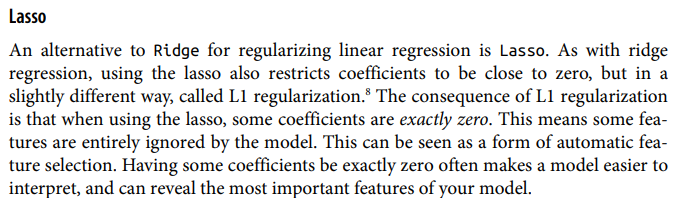

Nó tương tự như ridge nhưng có một vài w exactly zero => vài feature bị bỏ qua tương ứng với những thành phần này không quan trọng => một trong những phương pháp feature selection 

## Linear models for classification

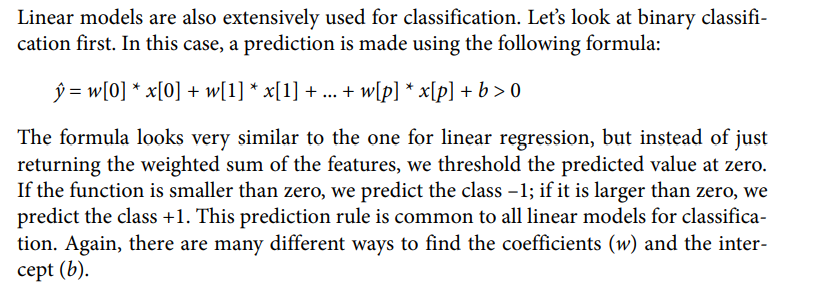

- thay vì tìm w, nó tìm y, nếu y>0 => class 1, y<0 class -1
- The two most common linear classification algorithms are logistic regression, implemented in linear_model.LogisticRegression, and linear support vector machines
(linear SVMs), implemented in svm.LinearSVC (SVC stands for support vector classifier).

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

C:\Users\hoang\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
C:\Users\hoang\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


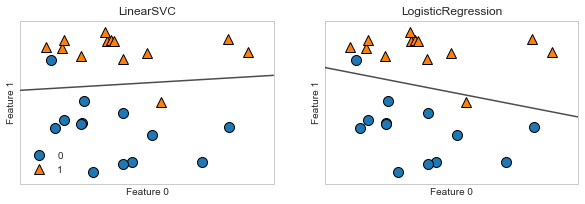

In [56]:
X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()


In [59]:
X, y 


(array([[ 9.96346605,  4.59676542],
        [11.0329545 , -0.16816717],
        [11.54155807,  5.21116083],
        [ 8.69289001,  1.54322016],
        [ 8.1062269 ,  4.28695977],
        [ 8.30988863,  4.80623966],
        [11.93027136,  4.64866327],
        [ 9.67284681, -0.20283165],
        [ 8.34810316,  5.13415623],
        [ 8.67494727,  4.47573059],
        [ 9.17748385,  5.09283177],
        [10.24028948,  2.45544401],
        [ 8.68937095,  1.48709629],
        [ 8.92229526, -0.63993225],
        [ 9.49123469,  4.33224792],
        [ 9.25694192,  5.13284858],
        [ 7.99815287,  4.8525051 ],
        [ 8.18378052,  1.29564214],
        [ 8.7337095 ,  2.49162431],
        [ 9.32298256,  5.09840649],
        [10.06393839,  0.99078055],
        [ 9.50048972, -0.26430318],
        [ 8.34468785,  1.63824349],
        [ 9.50169345,  1.93824624],
        [ 9.15072323,  5.49832246],
        [11.563957  ,  1.3389402 ]]),
 array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 

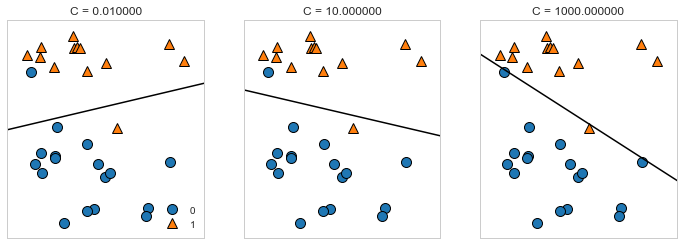

In [60]:
mglearn.plots.plot_linear_svc_regularization()

In [63]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.944
Test set score: 0.958


C:\Users\hoang\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(array([[1.989e+01, 2.026e+01, 1.305e+02, ..., 1.613e-01, 2.549e-01,
         9.136e-02],
        [1.289e+01, 1.312e+01, 8.189e+01, ..., 5.366e-02, 2.309e-01,
         6.915e-02],
        [1.714e+01, 1.640e+01, 1.160e+02, ..., 2.550e-01, 4.066e-01,
         1.059e-01],
        ...,
        [1.546e+01, 2.395e+01, 1.038e+02, ..., 2.163e-01, 3.013e-01,
         1.067e-01],
        [1.705e+01, 1.908e+01, 1.134e+02, ..., 2.543e-01, 3.109e-01,
         9.061e-02],
        [9.777e+00, 1.699e+01, 6.250e+01, ..., 5.334e-02, 2.533e-01,
         8.468e-02]]),
 array([[1.275e+01, 1.670e+01, 8.251e+01, ..., 8.045e-02, 3.071e-01,
         8.557e-02],
        [1.799e+01, 2.066e+01, 1.178e+02, ..., 1.974e-01, 3.060e-01,
         8.503e-02],
        [1.496e+01, 1.910e+01, 9.703e+01, ..., 1.489e-01, 2.962e-01,
         8.472e-02],
        ...,
        [1.170e+01, 1.911e+01, 7.433e+01, ..., 5.741e-02, 3.487e-01,
         6.958e-02],
        [1.450e+01, 1.089e+01, 9.428e+01, ..., 1.221e-01, 2.889e-01,
   

In [64]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.958
Test set score: 0.951


C:\Users\hoang\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [65]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.934
Test set score: 0.930


C:\Users\hoang\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
